In [2]:
from PIL import Image
import numpy as np
import os
import glob
from tqdm import tqdm
from ants_reg import ImageRegistration
import ants
from metrics import Metrics
import pandas as pd
#Show the images and the difference image
import matplotlib.pyplot as plt

In [16]:
deep_cell_img_registered=np.array(Image.open('/nfs2/baos1/rudravg/registration_GCA112TIA/SyN/DeepCell_Results/GCA112TIA_DAPI_DAPI_12ms_ROUND_11_initial_reg.tif'))
normal_image=np.array(Image.open('/nfs2/baos1/rudravg/DeepCell_Results/GCA112TIA_DAPI_DAPI_30ms_ROUND_00_initial_reg.tif'))
original_image=np.array(Image.open('/nfs2/baos1/rudravg/DeepCell_Results/GCA112TIA_DAPI_DAPI_12ms_ROUND_11_initial_reg.tif'))
retention_mask=np.array(Image.open('/nfs2/baos1/rudravg/Retention_Masks/GCA112TIA_TISSUE_RETENTION.tif'))
retention_mask = (retention_mask > 0).astype(int)
deep_cell_img_registered = deep_cell_img_registered * retention_mask
normal_image = normal_image * retention_mask
original_image = original_image * retention_mask
deep_cell_img_registered = (deep_cell_img_registered > 0).astype(int)
normal_image = (normal_image > 0).astype(int)
original_image = (original_image > 0).astype(int)


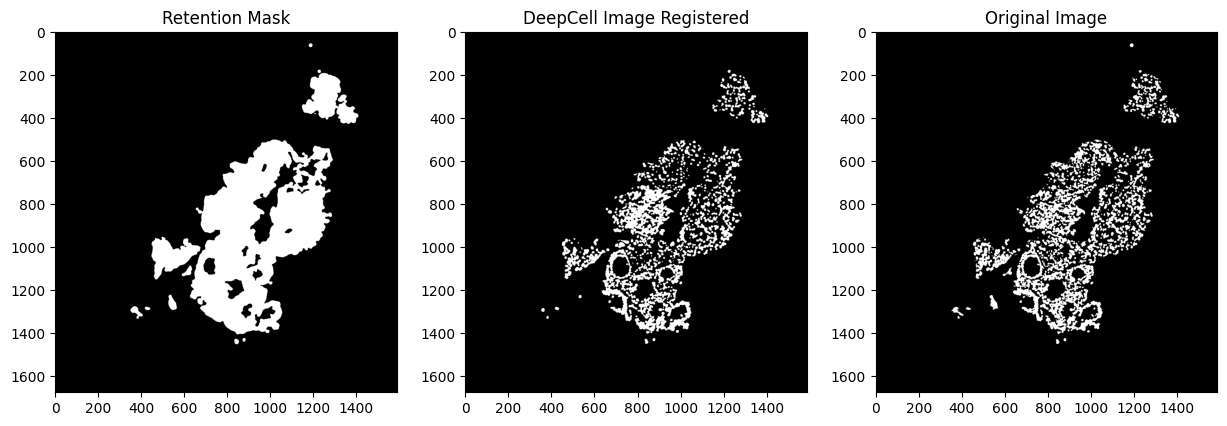

In [17]:
fig, ax = plt.subplots(1,3, figsize=(15, 15))
ax[0].imshow(retention_mask, cmap='gray')
ax[0].set_title('Retention Mask')
ax[1].imshow(deep_cell_img_registered, cmap='gray')
ax[1].set_title('DeepCell Image Registered')
ax[2].imshow(normal_image, cmap='gray')
ax[2].set_title('Original Image')
plt.show()

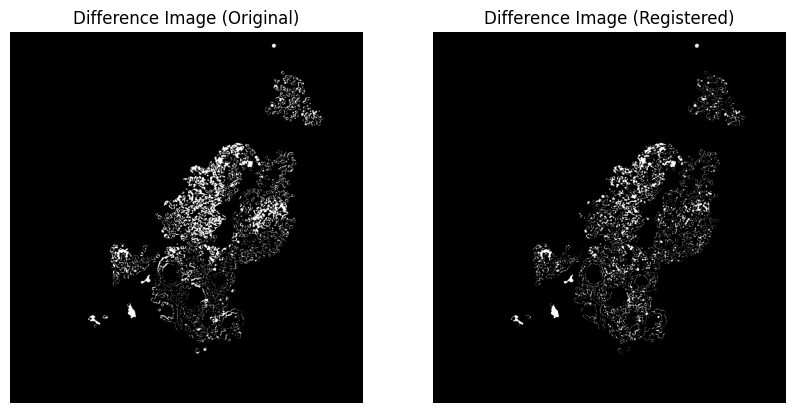

In [18]:
# Plot the difference images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the difference between original_image and normal_image
ax[0].imshow(abs(original_image - normal_image), cmap='gray')
ax[0].set_title('Difference Image (Original)')
ax[0].axis('off')

# Plot the difference between deep_cell_img_registered and normal_image
ax[1].imshow(abs(deep_cell_img_registered - normal_image), cmap='gray')
ax[1].set_title('Difference Image (Registered)')
ax[1].axis('off')


""
plt.show()


(-0.5, 1588.5, 1674.5, -0.5)

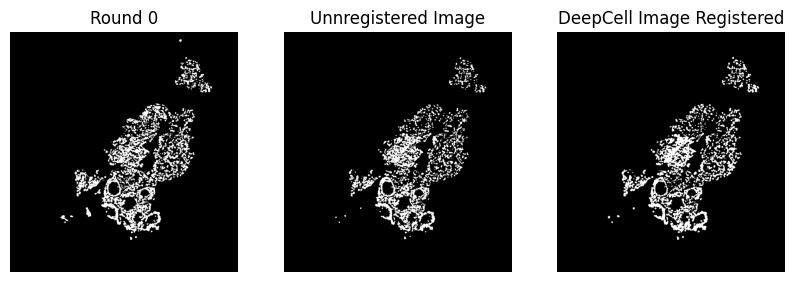

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].imshow(normal_image, cmap='gray')
ax[0].set_title('Round 0')
ax[0].axis('off')

ax[1].imshow(original_image, cmap='gray')
ax[1].set_title('Unnregistered Image')
ax[1].axis('off')

ax[2].imshow(deep_cell_img_registered, cmap='gray')
ax[2].set_title('DeepCell Image Registered')
ax[2].axis('off')


***Checkerboard***

In [20]:
deep_cell_img_registered=np.array(Image.open('/nfs2/baos1/rudravg/registration_GCA112TIA/SyN/GCA112TIA_DAPI_DAPI_12ms_ROUND_11_initial_reg.tif'))
normal_image=np.array(Image.open('/nfs2/baos1/rudravg/GCA112TIA_DAPI_DAPI_30ms_ROUND_00_initial_reg.tif'))
original_image=np.array(Image.open('/nfs2/baos1/rudravg/GCA112TIA_DAPI_DAPI_12ms_ROUND_11_initial_reg.tif'))
retention_mask=np.array(Image.open('/nfs2/baos1/rudravg/Retention_Masks/GCA112TIA_TISSUE_RETENTION.tif'))
retention_mask = (retention_mask > 0).astype(int)
deep_cell_img_registered = deep_cell_img_registered * retention_mask
normal_image = normal_image * retention_mask
original_image = original_image * retention_mask


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


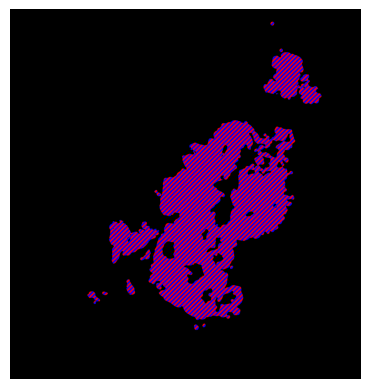

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming deep_cell_img_registered and normal_image are already loaded grayscale images
# Convert grayscale images to RGB
deep_cell_img_registered_rgb = np.stack([deep_cell_img_registered]*3, axis=-1)
normal_image_rgb = np.stack([normal_image]*3, axis=-1)

# Define the size of the checkerboard squares
square_size = 10

# Create a checkerboard pattern mask
checkerboard = np.indices((deep_cell_img_registered_rgb.shape[0], deep_cell_img_registered_rgb.shape[1])).sum(axis=0) % (2 * square_size) < square_size

# Apply a color tint to the squares from each image
# For squares from deep_cell_img_registered, apply a red tint
red_tint = np.array([1, 0, 0])  # RGB for red
deep_cell_img_registered_colored = np.where(checkerboard[..., None], deep_cell_img_registered_rgb * red_tint, 0)

# For squares from normal_image, apply a blue tint
blue_tint = np.array([0, 0, 1])  # RGB for blue
normal_image_colored = np.where(~checkerboard[..., None], normal_image_rgb * blue_tint, 0)

# Combine the two images
checkerboard_image_colored = deep_cell_img_registered_colored + normal_image_colored

# Plot the checkerboard image
plt.imshow(checkerboard_image_colored)
plt.axis('off')  # To not show axis values
plt.show()


(-0.5, 1588.5, 1674.5, -0.5)

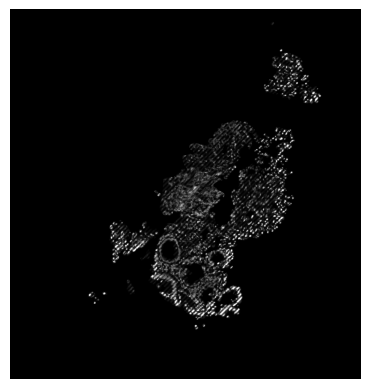

In [104]:

# Define the size of the checkerboard squares
square_size = 10

# Create a checkerboard pattern mask
checkerboard = np.indices(dimensions=(deep_cell_img_registered.shape)).sum(axis=0) % (2 * square_size) < square_size

# Apply the checkerboard mask to the images
checkerboard_image = np.where(checkerboard, deep_cell_img_registered, normal_image)

# Plot the checkerboard image
plt.imshow(checkerboard_image, cmap='gray')
plt.axis('off')  # To not show axis values

In [25]:
fi = ants.image_read('/nfs2/baos1/rudravg/GCA112TIA_DAPI_DAPI_30ms_ROUND_00_initial_reg.tif')

mi = ants.image_read('/nfs2/baos1/rudravg/GCA112TIA_DAPI_DAPI_12ms_ROUND_11_initial_reg.tif')

mytx = ants.registration(fixed=fi, moving=mi, type_of_transform = ('SyNAggro'),reg_iterations=(100, 70, 50, 30) )



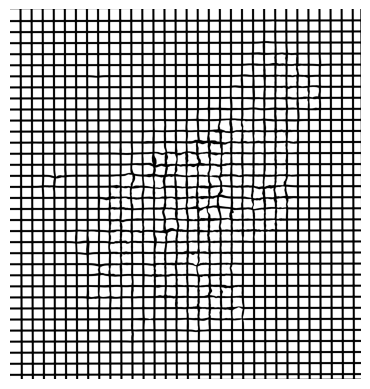

In [30]:
mywarpedgrid = ants.create_warped_grid( mi, grid_step=50,grid_width=10,grid_directions=(True,True),
                        transform=mytx['fwdtransforms'], fixed_reference_image=fi )
ants.plot(mywarpedgrid) 